<a href="https://colab.research.google.com/github/Heity94/WalkieLookie/blob/main/notebooks/ParkData_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx
!pip install networkx
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 4.4 MB/s 
     |████████████████████████████████| 11.2 MB 55.4 MB/s 
     |████████████████████████████████| 1.0 MB 74.8 MB/s 
     |████████████████████████████████| 1.0 MB 58.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 6.3 MB 48.6 MB/s 
     |████████████████████████████████| 16.7 MB 55.0 MB/s 
     |████████████████████████████████| 930 kB 44.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


❗**Attention**: In order to make the code work you need to **restart your runtime** afer executing the cell above ☝ (not just reloading the web page).<br> 
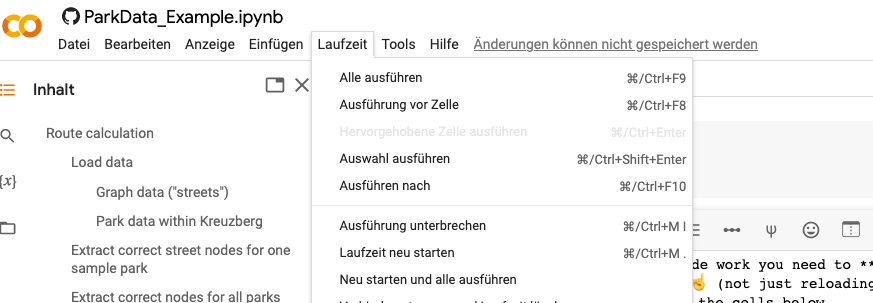
<br>
After that you can continue with running the cells below 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Route calculation

In [ ]:
#Import all the packages
import pickle
import folium
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
ox.config(log_console=True, use_cache=True)
from geopy.geocoders import Nominatim
from networkx.algorithms import approximation as approx # Greedy salesman algorithms

## Load data

In [ ]:
# Link to common google drive folder (you have to add a link from the foder to your drive first)
#data_path = "/content/drive/MyDrive/BPI Lap WalkieLookie/Data/"
data_path = "/content/drive/MyDrive/WalkieLookie/BPI Lap WalkieLookie/Data" #Roger

### Graph data ("streets") 

To load the graph data we can either:
- Give an address and use a radius to get the graph data  
- Or we can give an area as a location 

For a small test we only use a small graph close to one particular park in Berlin Kreuzberg: 

In [ ]:
## We can either give an address and use a radius to get the graph data 
locator = Nominatim(user_agent = "myapp")
address = "Schönleinstraße 8, 10967 Berlin"
latlng = locator.geocode(address).point

# Define "mode" of graph data 
mode = 'walk'       # 'drive', 'bike', 'walk'

## create graph from OSM within the boundaries of some geocodable place(s) and save as pickle file
#graph_bln_kzb_tst = ox.graph_from_point(latlng[:2], dist=200, network_type = mode) 
#with open(data_path+'graph_bln_kzb_tst.obj', 'wb') as fp:
#    pickle.dump(graph_bln_kzb_tst, fp)

## load stored graph pickle file
with open(data_path+'graph_bln_kzb_tst.obj', 'rb') as fp:
  graph_bln_kzb_tst = pickle.load(fp)

In [ ]:
# Check number of nodes
len(graph_bln_kzb_tst.nodes())

194

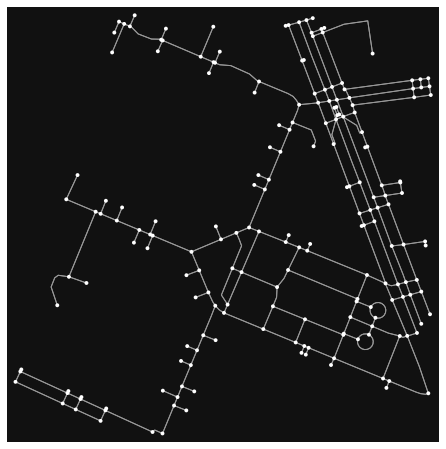

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
# Lets plot the map
ox.plot_graph(graph_bln_kzb_tst)

The graph below is for complete Kreuzberg/ Friedrichshain

In [ ]:
## Or we can give an area as a location
place = 'kreuzberg-friedrichshain, Berlin, Germany'

#graph_bln_kzb = ox.graph_from_place(place, network_type = mode)
#with open(data_path+'graph_bln_kzb.obj', 'wb') as fp:
#    pickle.dump(graph_bln_kzb, fp)

#load stored graph pickle file
with open(data_path+'graph_bln_kzb.obj', 'rb') as fp:
  graph_bln_kzb = pickle.load(fp)

In [ ]:
# Check number of nodes
len(graph_bln_kzb.nodes())

6484

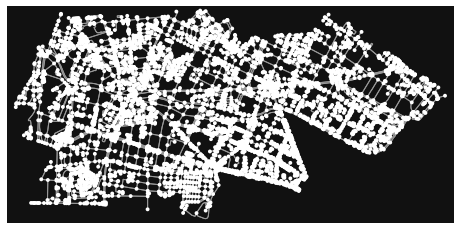

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
# Lets plot the map
ox.plot_graph(graph_bln_kzb)

### Park data within Kreuzberg

In [ ]:
## Get park data
# Get all public parks around given address within 1000m
address = "Schönleinstraße 8, 10967 Berlin"
tags = {"leisure":"park", "access":False}
#bln_xberg_parks = ox.geometries.geometries_from_address(address, tags, dist=2500)

#with open(data_path+'bln_parks_xberg.obj', 'wb') as fp:
#    pickle.dump(bln_xberg_parks, fp)

#load stored graph pickle file
with open(data_path+'bln_parks_xberg.obj', 'rb') as fp:
  bln_xberg_parks = pickle.load(fp)

In [ ]:
# Check relevant columns of geodataframe
bln_xberg_parks[["name","geometry","nodes"]]

name  \
element_type osmid                               
way          4638994              Viktoriapark   
             12773361                      NaN   
             13853629               Körnerpark   
             15740772           Görlitzer Park   
             17370094  Luisenstädtischer Kanal   
...                                        ...   
relation     2629048              Waldpflanzen   
             7317281          Tempelhofer Feld   
             11289044           Schmollerplatz   
             14235419           East-Side-Park   
             14236112       Schlesischer Busch   

                                                                geometry  \
element_type osmid                                                         
way          4638994   POLYGON ((13.38077 52.48678, 13.38067 52.48678...   
             12773361  POLYGON ((13.38160 52.50067, 13.38212 52.50142...   
             13853629  POLYGON ((13.43680 52.47167, 13.43669 52.47165...   
             15740772  POLYGON ((13.43207 52.49917, 13.43379 52.49861...   
             17370094  POLYGON ((13.41592 52.50285, 13.41598 52.50288...   
...                                                                  ...   
relation     2629048   POLYGON ((13.42198 52.50510, 13.42203 52.50517...   
             7317281   POLYGON ((13.38611 52.47616, 13.38634 52.47615...   
             11289044  MULTIPOLYGON (((13.44490 52.49007, 13.44489 52...   
             14235419  MULTIPOLYGON (((13.43919 52.50486, 13.43922 52...   
             14236112  MULTIPOLYGON (((13.44457 52.49410, 13.44488 52...   

                                                                   nodes  
element_type osmid                                                        
way          4638994   [29498354, 9794592031, 241490692, 29498355, 23...  
             12773361  [116834628, 116834632, 3411068725, 116834636, ...  
             13853629  [6329651091, 2215103937, 9238292155, 221510394...  
             15740772  [157468271, 5630371489, 5630371476, 697071736,...  
             17370094  [659848356, 4613781437, 4613781438, 2447098996...  
...                                                                  ...  
relation     2629048   [[[29276222, 571156370, 29276211], [29276222, ...  
             7317281   [[[936992252, 9431563866, 5058063277, 94315638...  
             11289044  [[[260739742, 7701465316, 7990039474, 79900394...  
             14235419  [[[9806559700, 9806828911, 9806828910, 9806828...  
             14236112  [[[9807079657, 332626018, 5917512751, 33231077...  

[143 rows x 3 columns]

In [ ]:
bln_xberg_parks[bln_xberg_parks.name=="Tempelhofer Feld"]

,,description,name,geometry,access,barrier,operator,source,addr:city,addr:country,addr:housenumber,...,protection_title,reg_name,landuse,name:fa,place,bldam:criteria,cutting,was:landuse,noname,ways
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
relation,7317281,NaN,Tempelhofer Feld,"POLYGON ((13.38611 52.47616, 13.38634 52.47615...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Geschützte Grünanlage,NaN,recreation_ground,NaN,NaN,NaN,NaN,NaN,NaN,"[498815758, 80278919, 498815755, 80735429, 276..."


- The geometry column contains a list of coordinates which "enlcose" the park (aka Polygons)
- The column nodes **DOES NOT CONTAIN** the nodes (ways) within the parks, but only contains nodes which "enclose" the parks. These nodes are not useful for our project since we need the nodes "within" the park to plan the route

Current status of the Overpass API Call


```
/*
This has been generated by the overpass-turbo wizard.
The original search was:
“cemetery in friedrichshain-kreuzberg ”
*/
[out:json][timeout:25];
// fetch area “friedrichshain-kreuzberg” to search in
{{geocodeArea:friedrichshain-kreuzberg}}->.searchArea;
// gather results
(
  // query part for: “cemetery”
  wr["landuse"="cemetery"](area.searchArea);
  
  // query part for: “public parks”
  nwr["leisure"="park"]["access"!="private"](area.searchArea);
  
  // query part for: “forest”
  nwr["landuse"="forest"](area.searchArea);
  
);
// print results
out body;
>;
out skel qt;
```





## Extract correct street nodes for one sample park

### Simple Polygon

In [ ]:
# Filter park dataframe to one sample park 
bln_xberg_parks_sample = bln_xberg_parks[bln_xberg_parks.name=="Hohenstaufenplatz"][["name","geometry","nodes"]]

In [ ]:
# Lets check if nodes are really not included in the berlin fhain graph data 
len([node for node in bln_xberg_parks_sample.nodes if node in list(graph_bln_kzb.nodes())])

0

None of the nodes from the park is in our graph data -.-

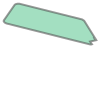

In [ ]:
# The polygon can be rendered in Google colab
smpl_park_polygon = bln_xberg_parks_sample.iloc[0,1] #access geometry cell of the sample park
smpl_park_polygon

To get the nodes & edges of "streets" within a park we need to call the OSM API again using the polygon as a search area 

In [ ]:
%%time
# get all "streets" within the polygon (sample park)
sample_park_nodes = ox.geometries.geometries_from_polygon(smpl_park_polygon, {"highway":True, "type":"way"})

CPU times: user 511 ms, sys: 48.6 ms, total: 560 ms
Wall time: 1min 9s


In [ ]:
# Check data
sample_park_nodes.head()

highway  \
element_type osmid               
way          83707722  footway   
             83707723  footway   
             83707726  footway   
             83707728  footway   
             83707729  footway   

                                                                geometry  \
element_type osmid                                                         
way          83707722  LINESTRING (13.42070 52.49156, 13.42082 52.491...   
             83707723  LINESTRING (13.42163 52.49173, 13.42147 52.491...   
             83707726  LINESTRING (13.42147 52.49154, 13.42244 52.49130)   
             83707728  LINESTRING (13.42257 52.49150, 13.42244 52.491...   
             83707729  LINESTRING (13.42234 52.49114, 13.42264 52.491...   

                                                                   nodes  \
element_type osmid                                                         
way          83707722                 [974862685, 6796345497, 974863080]   
             83707723  [974862863, 974862934, 6796338743, 974863080, ...   
             83707726                             [974862934, 974862794]   
             83707728  [974862885, 974862794, 6796345498, 974862834, ...   
             83707729  [974862834, 6796345539, 6796345538, 2485503679...   

                      bicycle lit surface  
element_type osmid                         
way          83707722      no  no  gravel  
             83707723      no  no  gravel  
             83707726      no  no  gravel  
             83707728      no  no  gravel  
             83707729      no  no  gravel

Now we have a dataframe with a list of nodes for each "street" within this park.

In [ ]:
# Lets combine all list of nodes into one 
import itertools
sample_park_nodes_compl = list(itertools.chain.from_iterable(sample_park_nodes.nodes.to_list())) #iterate over all rows

In [ ]:
# number of nodes in the park
len(sample_park_nodes_compl)

83

Let's check if these nodes are also present in our graph data from berlin kreuzberg

In [ ]:
# check if nodes are included in the berlin fhain graph data 
sample_park_nodes_clean = [node for node in sample_park_nodes_compl if node in list(graph_bln_kzb.nodes())]
len(sample_park_nodes_clean)

41

It worked 🎉 (at least for half of the nodes)

Since we now have the "right" nodes for our routing we can now find the center of the park which we then could eventually pass on to the routing algorithm 

In [ ]:
# Get the center node(s) of the sample park 
nx.center(graph_bln_kzb.subgraph(sample_park_nodes_clean))

[6796345498, 974862913]

### Multipolygon

In [ ]:
# Only keep relevant columns and reset Multiindex
bln_xberg_parks_cln = bln_xberg_parks.reset_index()[["element_type", "osmid", "name","geometry","nodes"]]
bln_xberg_parks_cln.head()

,element_type,osmid,name,geometry,nodes
0,way,4638994,Viktoriapark,"POLYGON ((13.38077 52.48678, 13.38067 52.48678...","[29498354, 9794592031, 241490692, 29498355, 23..."
1,way,12773361,NaN,"POLYGON ((13.38160 52.50067, 13.38212 52.50142...","[116834628, 116834632, 3411068725, 116834636, ..."
2,way,13853629,Körnerpark,"POLYGON ((13.43680 52.47167, 13.43669 52.47165...","[6329651091, 2215103937, 9238292155, 221510394..."
3,way,15740772,Görlitzer Park,"POLYGON ((13.43207 52.49917, 13.43379 52.49861...","[157468271, 5630371489, 5630371476, 697071736,..."
4,way,17370094,Luisenstädtischer Kanal,"POLYGON ((13.41592 52.50285, 13.41598 52.50288...","[659848356, 4613781437, 4613781438, 2447098996..."


In [ ]:
# Try out gettign nodes within Multipolygon
multipolygon_sample = bln_xberg_parks_cln.iloc[-1,3]

In [ ]:
# Call API to get nodes
multipolygon_smpl_nodes = ox.geometries.geometries_from_polygon(multipolygon_sample, {"highway":True, "type":"way"})

In [ ]:
multipolygon_smpl_nodes = multipolygon_smpl_nodes.reset_index()[["element_type", "osmid","geometry","nodes"]]
multipolygon_smpl_nodes.head(3)

,element_type,osmid,geometry,nodes
0,node,5865991167,POINT (13.45150 52.49622),NaN
1,way,16311750,"LINESTRING (13.44671 52.49465, 13.44639 52.494...","[29787346, 1934347106, 29787347, 262005337]"
2,way,23044095,"LINESTRING (13.44783 52.49476, 13.44797 52.494...","[167010491, 1462336095, 1462336097, 9807079602..."


- In general the function also works for multipolygons
- No idea why, but the query also gives back elements of type "node". These elements do NOT have attributes in the "nodes" column and therefore (since they are only singular nodes), so we could just add them to our list when checking wheter these are on the graph

## Extract correct nodes for all parks within Kreuzberg

Now let's see if we can just loop over all parks and extract the "path" nodes and store them as a dictionary. Hopefully we find a better solution though .... 

In [ ]:
# Function to flatten irregular list of lists
from collections.abc import Iterable

def flatten(xs):
  '''Function to flatten irregular list of lists'''
  for x in xs:
    if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
        yield from flatten(x)
    else:
        yield x

In [ ]:
# Check the number of coordinates per park polygon (does not work for multipolygon)
bln_xberg_parks_cln[bln_xberg_parks_cln.element_type=="way"].geometry.apply(lambda x: np.array(x.exterior.coords.xy).shape).sort_values()

127      (2, 5)
21       (2, 5)
38       (2, 5)
124      (2, 5)
113      (2, 5)
         ...   
3      (2, 100)
94     (2, 101)
114    (2, 111)
131    (2, 115)
69     (2, 167)
Name: geometry, Length: 134, dtype: object

In [ ]:
bln_xberg_parks_cln

,element_type,osmid,name,geometry,nodes
0,way,4638994,Viktoriapark,"POLYGON ((13.38077 52.48678, 13.38067 52.48678...","[29498354, 9794592031, 241490692, 29498355, 23..."
1,way,12773361,NaN,"POLYGON ((13.38160 52.50067, 13.38212 52.50142...","[116834628, 116834632, 3411068725, 116834636, ..."
2,way,13853629,Körnerpark,"POLYGON ((13.43680 52.47167, 13.43669 52.47165...","[6329651091, 2215103937, 9238292155, 221510394..."
3,way,15740772,Görlitzer Park,"POLYGON ((13.43207 52.49917, 13.43379 52.49861...","[157468271, 5630371489, 5630371476, 697071736,..."
4,way,17370094,Luisenstädtischer Kanal,"POLYGON ((13.41592 52.50285, 13.41598 52.50288...","[659848356, 4613781437, 4613781438, 2447098996..."
...,...,...,...,...,...
138,relation,2629048,Waldpflanzen,"POLYGON ((13.42198 52.50510, 13.42203 52.50517...","[[[29276222, 571156370, 29276211], [29276222, ..."
139,relation,7317281,Tempelhofer Feld,"POLYGON ((13.38611 52.47616, 13.38634 52.47615...","[[[936992252, 9431563866, 5058063277, 94315638..."
140,relation,11289044,Schmollerplatz,"MULTIPOLYGON (((13.44490 52.49007, 13.44489 52...","[[[260739742, 7701465316, 7990039474, 79900394..."
141,relation,14235419,East-Side-Park,"MULTIPOLYGON (((13.43919 52.50486, 13.43922 52...","[[[9806559700, 9806828911, 9806828910, 9806828..."


In [ ]:
def retrieve_nodes_within_park(park_data):
  '''Takes one row of the park dataframe and returns dictonary with name and nodes within park'''

  park = park_data.geometry
  name = park_data["name"]
  osmid_park = park_data.osmid

  park_nds = ox.geometries.geometries_from_polygon(park, {"highway":True, "type":"way"})
  
  try:
    park_nds = park_nds.reset_index()[["element_type", "osmid","geometry","nodes"]] #reset index and only keep relevant columns

    park_nodes_compl = list(flatten(park_nds[park_nds.element_type=="node"].osmid)) # add all single nodes to list
    park_nodes_compl += list(flatten(park_nds[park_nds.element_type=="way"].nodes)) # add all way nodes to list
    
    return {
      "osmid":osmid_park,
      "name":name,
      "nodes_within_park": park_nodes_compl
      }
  except KeyError: #in case of an error / no ways etc. found return same columns, but set column nodes within park to np.nan
    return {
      "osmid":osmid_park,
      "name":name,
      "nodes_within_park": np.nan
      }

In [ ]:
# test function on one park
bln_xberg_parks_cln.head(1).apply(retrieve_nodes_within_park, axis=1, result_type="expand")

,name,nodes_within_park,osmid
0,Viktoriapark,"[7086354702, 7086354703, 7086354704, 708635470...",4638994


Seems to work, now lets try it on all parks:

In [ ]:
%%time 
bln_xberg_parks_park_nodes = bln_xberg_parks_cln.apply(retrieve_nodes_within_park, axis=1, result_type="expand")

CPU times: user 57.8 s, sys: 5.87 s, total: 1min 3s
Wall time: 2h 5min 52s


In [ ]:
bln_xberg_parks_park_nodes

,osmid,name,nodes_within_park
0,4638994.0,Viktoriapark,"[7086354702, 7086354703, 7086354704, 708635470..."
1,12773361.0,NaN,"[710862331, 3411068721, 9582743421, 710862332,..."
2,13853629.0,Körnerpark,"[9311122713, 9238292155, 1455122375, 145512220..."
3,15740772.0,Görlitzer Park,"[5630371451, 5630371452, 5630371453, 563037145..."
4,17370094.0,Luisenstädtischer Kanal,"[283251000, 359549011, 791390982, 283251038, 2..."
...,...,...,...
138,2629048.0,Waldpflanzen,"[848495810, 3014575452, 3014575467, 3880659210..."
139,7317281.0,Tempelhofer Feld,"[727341442, 731644262, 5454115321, 5492275322,..."
140,11289044.0,Schmollerplatz,"[7368740568, 3874545782, 7859002133, 785885394..."
141,14235419.0,East-Side-Park,"[476571126, 476571133, 476571121, 476571134, 4..."


In [ ]:
#bln_xberg_parks_park_nodes_from_csv = pd.read_csv(data_path+"/bln_xberg_parks_park_nodes.csv", index_col=0)

In [ ]:
#with open(data_path+'bln_xberg_parks_park_nodes.obj', 'wb') as fp:
#     pickle.dump(bln_xberg_parks_park_nodes, fp)

In [ ]:
#to csv
#bln_xberg_parks_park_nodes.to_csv(data_path+'bln_xberg_parks_park_nodes.csv')

# **Roger time-node approach**



**Node count**

In [ ]:
bln_xberg_wo_NaN = pd.read_csv(data_path+"/bln_xberg_parks_park_nodes_wo_NaN.csv", index_col=0)

In [ ]:
#with open(data_path+'/bln_xberg_parks_park_nodes.obj', 'rb') as fp:
#  bln_xberg_parks_park_nodes_from_csv = pickle.load(fp)

In [ ]:
bln_xberg_wo_NaN.head(5)

,osmid,name,nodes_within_park
0,4638994.0,Viktoriapark,"[7086354702, 7086354703, 7086354704, 708635470..."
1,12773361.0,NaN,"[710862331, 3411068721, 9582743421, 710862332,..."
2,13853629.0,Körnerpark,"[9311122713, 9238292155, 1455122375, 145512220..."
3,15740772.0,Görlitzer Park,"[5630371451, 5630371452, 5630371453, 563037145..."
4,17370094.0,Luisenstädtischer Kanal,"[283251000, 359549011, 791390982, 283251038, 2..."


In [ ]:
bln_xberg_wo_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 142
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   osmid              133 non-null    float64
 1   name               54 non-null     object 
 2   nodes_within_park  133 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.2+ KB


In [ ]:
bln_xberg_wo_NaN[['nodes_within_park']].info

<bound method DataFrame.info of                                      nodes_within_park
0    [7086354702, 7086354703, 7086354704, 708635470...
1    [710862331, 3411068721, 9582743421, 710862332,...
2    [9311122713, 9238292155, 1455122375, 145512220...
3    [5630371451, 5630371452, 5630371453, 563037145...
4    [283251000, 359549011, 791390982, 283251038, 2...
..                                                 ...
138  [848495810, 3014575452, 3014575467, 3880659210...
139  [727341442, 731644262, 5454115321, 5492275322,...
140  [7368740568, 3874545782, 7859002133, 785885394...
141  [476571126, 476571133, 476571121, 476571134, 4...
142  [5865991167, 29787346, 1934347106, 29787347, 2...

[133 rows x 1 columns]>

In [ ]:
bln_xberg_wo_NaN["n_nodes"] = bln_xberg_parks_park_nodes.nodes_within_park.dropna().apply(lambda x: len(x))
bln_xberg_wo_NaN.head(50).sort_values("n_nodes", ascending=False)

,osmid,name,nodes_within_park,n_nodes
3,15740772.0,Görlitzer Park,"[5630371451, 5630371452, 5630371453, 563037145...",984
0,4638994.0,Viktoriapark,"[7086354702, 7086354703, 7086354704, 708635470...",979
40,50730926.0,Böcklerpark,"[7928986061, 7928986064, 7928986066, 792898606...",198
2,13853629.0,Körnerpark,"[9311122713, 9238292155, 1455122375, 145512220...",194
11,24183420.0,NaN,"[3609479715, 9111911443, 9111911431, 360947970...",173
23,26828930.0,Reuterplatz,"[7989834769, 7989834770, 1209172675, 146021919...",141
50,98599423.0,Rosengarten,"[283251004, 3014575450, 3014575446, 283250999,...",135
22,25964617.0,Oranienplatz,"[29217284, 283251141, 283251147, 283251528, 35...",129
25,29016696.0,Weichselplatz,"[663936428, 5339592337, 9202600461, 1650266067...",118
26,29016731.0,Wildenbruchplatz,"[6482772266, 6482772284, 6482772895, 648277289...",114


**Relation to time**

In [ ]:
from networkx.algorithms import approximation as approx

In [ ]:
#load stored graph pickle file
with open(data_path+'/graph_berlin.obj', 'rb') as fp:
  graph_berlin = pickle.load(fp)


#load stored graph pickle file
with open(data_path+'/bln_parks_xberg.obj', 'rb') as fp:
  bln_xberg_parks = pickle.load(fp)

In [ ]:
# Get center node from each park
park_nodes = bln_xberg_parks.nodes.apply(lambda x: nx.center(graph_berlin.subgraph(x))[0]).to_list()

ValueError: ignored

### Backup (not relevant anymore)

In [ ]:
# # Iterrate over all parks and store nodes within park as a dictonary
# park_nodes = {}

# for i, park in enumerate(bln_xberg_parks_cln.geometry):

#   park_nds = ox.geometries.geometries_from_polygon(park, {"highway":True, "type":"way"})
#   park_nds = park_nds.reset_index()[["element_type", "osmid","geometry","nodes"]] #reset index and only keep relevant columns
  
#   try:
#     park_nodes_compl = list(flatten(park_nds[park_nds.element_type=="node"].osmid)) # add all single nodes to list
#     park_nodes_compl += list(flatten(park_nds[park_nds.element_type=="way"].nodes)) # add all way nodes to list
#     park_nodes[bln_xberg_parks_cln.iloc[i,1]]={
#       "name":bln_xberg_parks_cln.iloc[i,2],
#       "nodes_within_park": park_nodes_compl
#     }
#   except:
#     print("Error for park:", i, park)
#     print("Continuing with next one")
#     continue

In [ ]:
# with open(data_path+'bln_parks_xberg_dict.obj', 'wb') as fp:
#     pickle.dump(park_nodes, fp)

In [ ]:
# check if nodes are included in the berlin fhain graph data 
#sample_park_nodes_clean = [node for node in sample_park_nodes_compl if node in list(graph_bln_kzb.nodes())]
#len(sample_park_nodes_clean)

## Calculate sample route which fits within the users timeframe